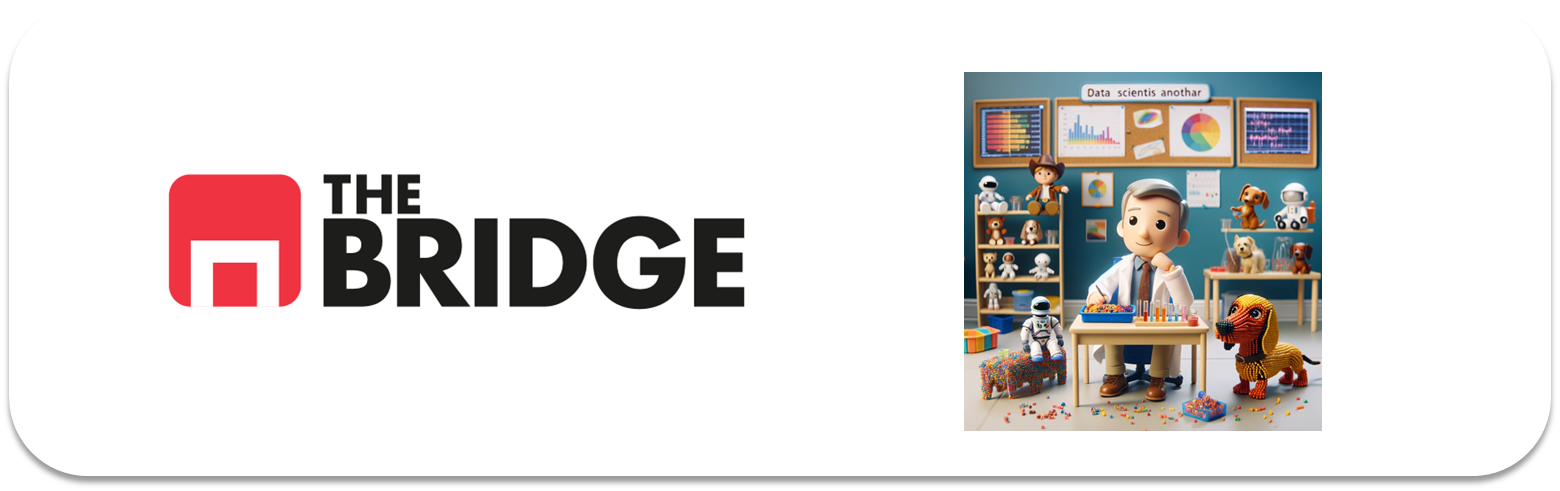

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [41]:

# Lista de los nombres de los datasets disponibles en Seaborn
datasets = sns.get_dataset_names()
print(datasets)  # Esto te mostrará todos los nombres disponibles

# Cargar el dataset del Titanic en un DataFrame
df_titanic = sns.load_dataset("titanic")

# Verificar que se ha cargado correctamente
print(df_titanic.head())  # Esto mostrará las primeras filas del DataFrame para confirmar la carga


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  South

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [42]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [43]:
porcentaje_nulos = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(porcentaje_nulos)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [44]:
# Eliminar columna "parch"
df_titanic_copy = df_titanic.copy()

# Eliminar la columna "age" de la copia
df_titanic_copy.drop(columns=['parch'], inplace=True)

In [45]:
# ¿Qué hacer con los nulos? Probar a quitar las columnas que tengan más de un 15% de nulos, es decir, un top de 15.
tope_nulos = 15
eliminar_columnas_nulos = porcentaje_nulos[porcentaje_nulos > tope_nulos].index
df_titanic_copy = df_titanic_copy.drop(eliminar_columnas_nulos, axis=1)

In [46]:
df_titanic_copy.head(5)

,survived,pclass,sex,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,8.0500,S,Third,man,True,Southampton,no,True


In [47]:
df_titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   sibsp        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   embarked     889 non-null    object  
 6   class        891 non-null    category
 7   who          891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   embark_town  889 non-null    object  
 10  alive        891 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(3), object(5)
memory usage: 65.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
|------------------|-------------|
| survived         | Sobrevivió (1) o no sobrevivió (1) |
| pclass           | Clase socioeconómica: primera, segunda, tercera |
| sex              | Hombre/male o female/mujer |
| sibsp            | Nº de familiares que viajan con la persona indicada |
| fare             | Precio del billete al Titanic |
| embarked       | Inicial de la letra de la ciudad donde embarcó la persona |
| class       | Clase en la que viajaba |
| who       | La persona pertenece al grupo de los hombres, mujeres, niños |
| adult_male       |  La persona es hombre y adulta (bool)|
| embarked_town       | Ciudad donde embarcó la persona |
| alive       | Si la persona está viva o no |
| alone       | Si la pesona viajaba sola o no (bool) |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

Cherbourg (Francia), Queenstown (Irlanda) y Southampton (Inglaterra)




In [48]:
df_titanic_copy['embarked'] = df_titanic_copy['embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df_titanic_copy.head(10)

,survived,pclass,sex,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,0,8.0500,Southampton,Third,man,True,Southampton,no,True
5,0,3,male,0,8.4583,Queenstown,Third,man,True,Queenstown,no,True
6,0,1,male,0,51.8625,Southampton,First,man,True,Southampton,no,True
7,0,3,male,3,21.0750,Southampton,Third,child,False,Southampton,no,False
8,1,3,female,0,11.1333,Southampton,Third,woman,False,Southampton,yes,False
9,1,2,female,1,30.0708,Cherbourg,Second,child,False,Cherbourg,yes,False


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [49]:
central_tendency = df_titanic_copy.describe()
central_tendency

,survived,pclass,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,32.204208
std,0.486592,0.836071,1.102743,49.693429
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,31.000000
max,1.000000,3.000000,8.000000,512.329200


### #2.1 Categóricas

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\97534662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df_titanic_copy, palette='Set1')


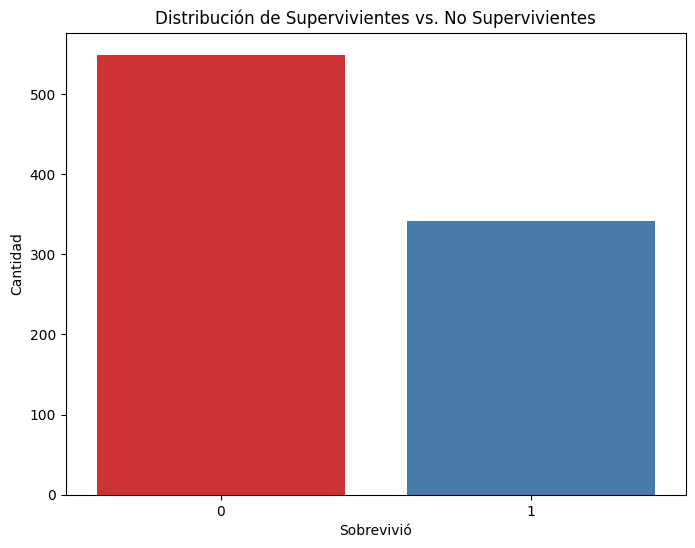

In [50]:
# Las categóricas son: survived, who, class, embarked, alone 

#Survived

plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df_titanic_copy, palette='Set1')
plt.title('Distribución de Supervivientes vs. No Supervivientes')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')
plt.show()


<Axes: xlabel='survived', ylabel='count'>

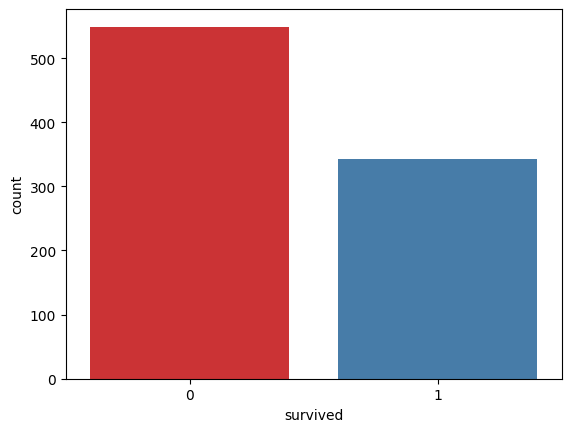

In [51]:
sns.countplot(x='survived', data=df_titanic, hue='survived', palette='Set1', legend=False) #Corrección de la advertencia anterior


C:\Users\maria\AppData\Local\Temp\ipykernel_22320\1832477353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_titanic_copy, palette='Set1')


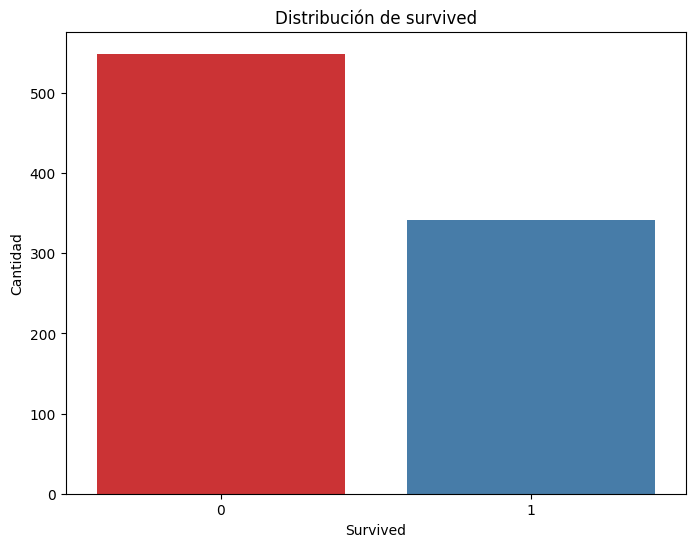

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\1832477353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_titanic_copy, palette='Set1')


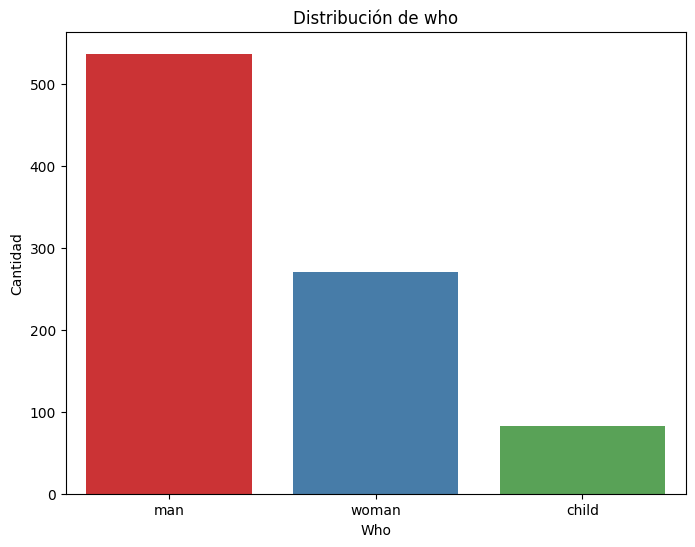

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\1832477353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_titanic_copy, palette='Set1')


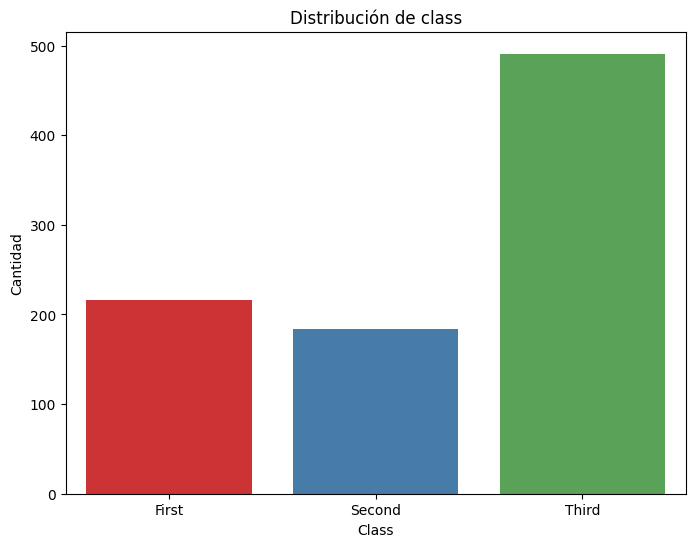

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\1832477353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_titanic_copy, palette='Set1')


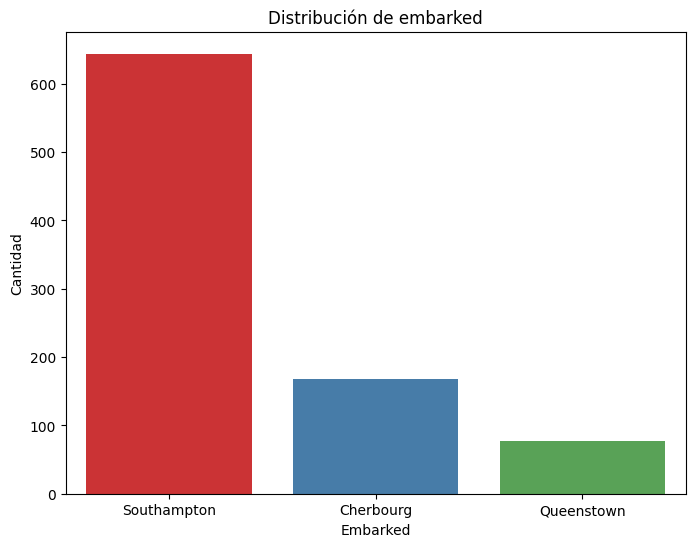

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\1832477353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_titanic_copy, palette='Set1')


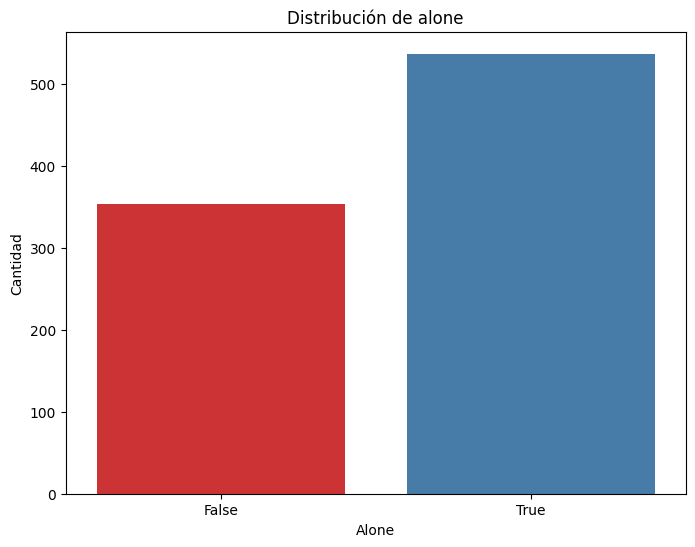

In [52]:
#Probar para todas las variables categóricas:

categoricas_variables = ["survived", "who", "class", "embarked", "alone"]

for var in categoricas_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df_titanic_copy, palette='Set1')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Cantidad')
    plt.show()


¿Qué vemos? Que mayoritamiamente viajaron hombres, solos, de tercera clase, embarcando desde Southampton y que hubieron más personas que murieron a las que sobrevivieron.


### #2.2 Numéricas

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\4101068161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, data=df_titanic, palette='Set2')


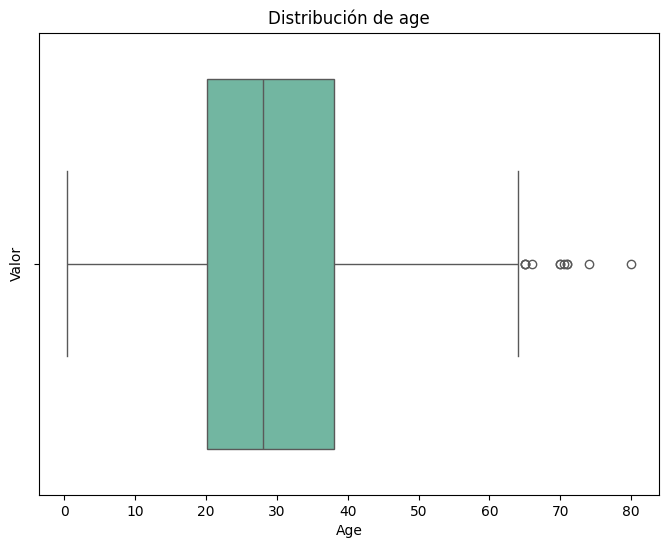

C:\Users\maria\AppData\Local\Temp\ipykernel_22320\4101068161.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, data=df_titanic, palette='Set2')


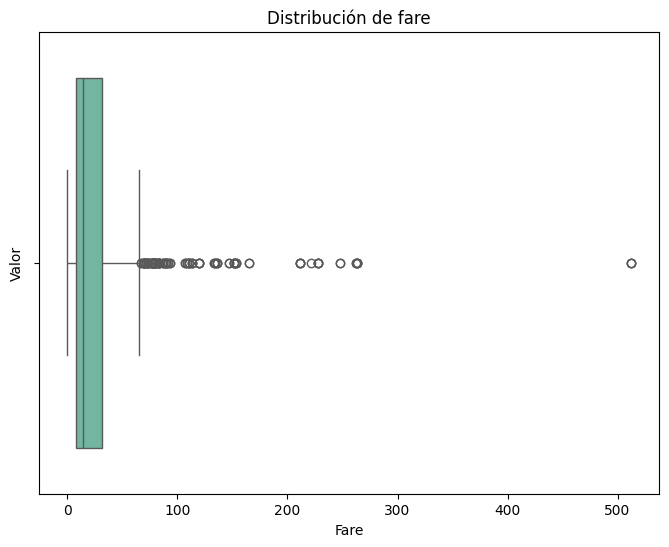

In [53]:
#Las numéricas son: age y fare

# Gráficos de caja para variables numéricas
variables_numericas = ["age", "fare"]
for variable in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=variable, data=df_titanic, palette='Set2')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Valor')
    plt.show()

In [54]:
print("Medidas de Dispersión:")
print(df_titanic[variables_numericas].describe().loc[['std', 'min', 'max']])
print()

Medidas de Dispersión:
           age        fare
std  14.526497   49.693429
min   0.420000    0.000000
max  80.000000  512.329200



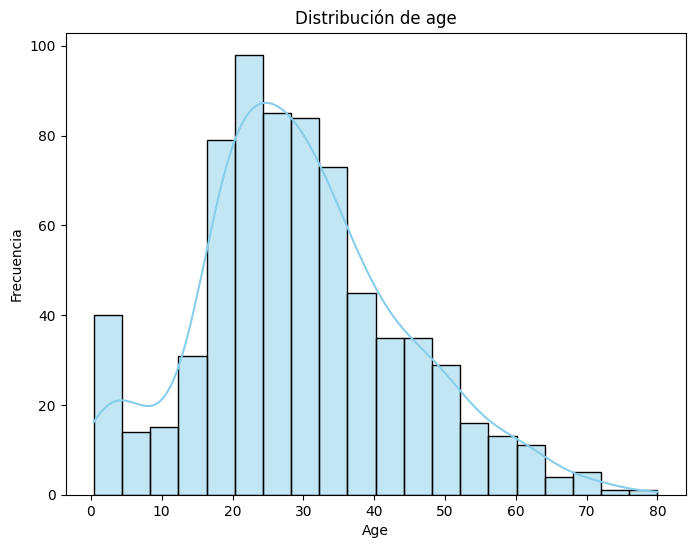

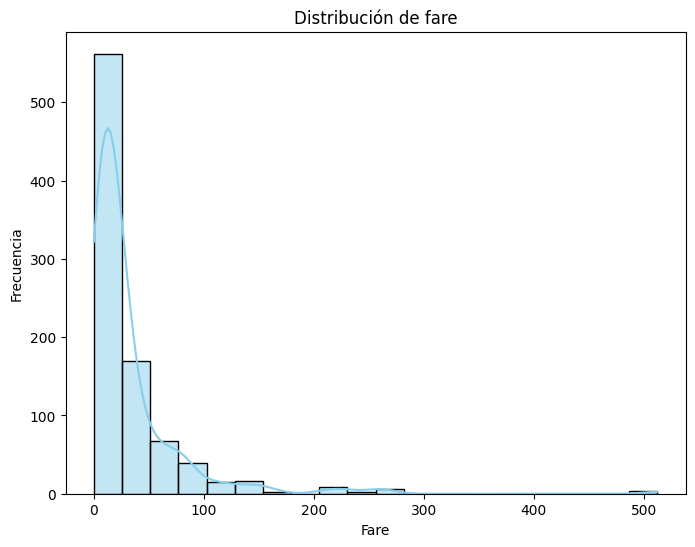

In [55]:
# Histogramas y funciones de densidad para variables numéricas
for variable in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_titanic[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Frecuencia')
    plt.show()